### First we follow simple approach for this task if we don't get good accuracy then we go for advanced version of this task

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import xgboost as xgb

# Load data
data = pd.read_csv(r"C:\ML Projects\DS-Intern-Assignment-Faheem-Khan\data\data.csv")

In [67]:
data.head()


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,1/11/2016 17:00,60,-77.78778597,33.74660934,47.59666667,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,1/11/2016 17:10,60,30,19.89,46.69333333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,1/11/2016 17:20,50,30,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,1/11/2016 17:30,50,40,33.74660934,46.06666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410390,45.410390
4,1/11/2016 17:40,60,40,19.89,46.33333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


#### Data statistics and info about dataset

In [68]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


#### Data Cleaning

#### Convert timestamp into datetime Convert numeric columns to float

In [69]:
# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Convert numeric columns to float
numeric_cols = [col for col in data.columns if col != 'timestamp']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Updated Data Types:")
print(data.dtypes)

Updated Data Types:
timestamp                       datetime64[ns]
equipment_energy_consumption           float64
lighting_energy                        float64
zone1_temperature                      float64
zone1_humidity                         float64
zone2_temperature                      float64
zone2_humidity                         float64
zone3_temperature                      float64
zone3_humidity                         float64
zone4_temperature                      float64
zone4_humidity                         float64
zone5_temperature                      float64
zone5_humidity                         float64
zone6_temperature                      float64
zone6_humidity                         float64
zone7_temperature                      float64
zone7_humidity                         float64
zone8_temperature                      float64
zone8_humidity                         float64
zone9_temperature                      float64
zone9_humidity                         f

In [70]:
# check for duplicates and drop them if any
duplicates = data.duplicated().sum()
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f"Removed {duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")
    
    
# --- 4. Handle NaN Values ---
# Drop rows where target is NaN
data = data.dropna(subset=['equipment_energy_consumption'])
print("\nShape after dropping rows with missing target:", data.shape)

Removed 68 duplicate rows.

Shape after dropping rows with missing target: (15880, 29)


#### Handle negitive values 

In [71]:
# --- 5. Handle Negative Values ---
non_negative_cols = [
    'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity',
    'zone6_humidity', 'zone7_humidity', 'zone8_humidity', 'zone9_humidity',
    'outdoor_humidity', 'wind_speed', 'visibility_index', 'lighting_energy'
]

for col in non_negative_cols:
    if (data[col] < 0).any():
        median_non_negative = data[data[col] >= 0][col].median()
        num_negatives = (data[col] < 0).sum()
        data.loc[data[col] < 0, col] = median_non_negative
        print(f"Replaced {num_negatives} negative values in '{col}' with median of non-negative values: {median_non_negative}")

plausible_negative_cols = [
    'outdoor_temperature', 'dew_point', 'zone6_temperature',
    'random_variable1', 'random_variable2'
]


for col in plausible_negative_cols:
    if (data[col] < 0).any():
        median_value = data[data[col] >= 0][col].median()
        num_negatives = (data[col] < 0).sum()
        data.loc[data[col] < 0, col] = median_value
        print(f"Replaced {num_negatives} negative values in '{col}' with median of non-negative values: {median_value}")

print("\nRetained negative values in plausible columns:", plausible_negative_cols)

Replaced 132 negative values in 'zone2_humidity' with median of non-negative values: 40.33333333
Replaced 177 negative values in 'zone3_humidity' with median of non-negative values: 38.4
Replaced 324 negative values in 'zone4_humidity' with median of non-negative values: 38.2
Replaced 289 negative values in 'zone5_humidity' with median of non-negative values: 49.0
Replaced 285 negative values in 'zone6_humidity' with median of non-negative values: 63.9
Replaced 331 negative values in 'zone7_humidity' with median of non-negative values: 34.378
Replaced 309 negative values in 'zone8_humidity' with median of non-negative values: 42.16333333
Replaced 173 negative values in 'zone9_humidity' with median of non-negative values: 40.46666667
Replaced 286 negative values in 'outdoor_humidity' with median of non-negative values: 84.66666667
Replaced 162 negative values in 'wind_speed' with median of non-negative values: 4.0
Replaced 173 negative values in 'visibility_index' with median of non-neg

#### find multicolinearity using VIF

In [72]:
# Temporary imputation for VIF calculation
data_temp = data.drop('timestamp', axis=1).copy()
data_temp.fillna(data_temp.median(), inplace=True)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each column
vif_scores = [variance_inflation_factor(data_temp.values, i) for i in range(data_temp.shape[1])]
vif_df = pd.DataFrame({'Column': data_temp.columns, 'VIF': vif_scores}).sort_values('VIF', ascending=False)

# Print VIF scores
print("VIF Scores for Each Column:")
print(vif_df)

VIF Scores for Each Column:
                          Column         VIF
21          atmospheric_pressure  362.058534
2              zone1_temperature  121.604579
6              zone3_temperature   88.211378
10             zone5_temperature   83.254571
18             zone9_temperature   73.170815
7                 zone3_humidity   70.882928
16             zone8_temperature   66.071857
8              zone4_temperature   65.771168
9                 zone4_humidity   61.752166
14             zone7_temperature   59.003252
4              zone2_temperature   57.548568
17                zone8_humidity   51.868799
19                zone9_humidity   46.673105
5                 zone2_humidity   45.341905
15                zone7_humidity   42.600023
22              outdoor_humidity   27.921857
3                 zone1_humidity   18.777850
11                zone5_humidity   18.298103
24              visibility_index    6.855472
13                zone6_humidity    4.989670
20           outdoor_temper

In [74]:
# Create average zone temperature and humidity
zone_temp_cols = [col for col in data.columns if 'zone' in col and 'temperature' in col]
zone_hum_cols = [col for col in data.columns if 'zone' in col and 'humidity' in col]
data['avg_zone_temp'] = data[zone_temp_cols].mean(axis=1)
data['avg_zone_humidity'] = data[zone_hum_cols].mean(axis=1)

# Drop individual zone features, atmospheric_pressure, random variables, and dew_point
data = data.drop(zone_temp_cols + zone_hum_cols + ['atmospheric_pressure', 'random_variable1', 'random_variable2', 'dew_point'], axis=1)

# Recalculate VIF to confirm
data_temp = data.drop('timestamp', axis=1).copy()
data_temp.fillna(data_temp.median(), inplace=True)
vif_scores_new = [variance_inflation_factor(data_temp.values, i) for i in range(data_temp.shape[1])]
vif_df_new = pd.DataFrame({'Column': data_temp.columns, 'VIF': vif_scores_new}).sort_values('VIF', ascending=False)
print("Updated VIF Scores:")
print(vif_df_new)

Updated VIF Scores:
                         Column        VIF
7             avg_zone_humidity  37.743203
6                 avg_zone_temp  33.123169
3              outdoor_humidity  24.443703
5              visibility_index   6.663187
2           outdoor_temperature   3.039582
4                    wind_speed   2.743868
0  equipment_energy_consumption   1.285697
1               lighting_energy   1.176719


#### EDA

In [75]:
# Sort by timestamp
data = data.sort_values('timestamp')

# Forward-fill
data.fillna(method='ffill', inplace=True)

# fillna for remaining NaN values with median
# Check for remaining NaN values
print("Missing Values Before Imputation:")
print(data.isnull().sum())
for col in data.keys():
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Verify
print("Missing Values After Imputation:")
print(data.isnull().sum())

Missing Values Before Imputation:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
outdoor_temperature             0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
avg_zone_temp                   0
avg_zone_humidity               0
dtype: int64
Missing Values After Imputation:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
outdoor_temperature             0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
avg_zone_temp                   0
avg_zone_humidity               0
dtype: int64


C:\Users\fahee\AppData\Local\Temp\ipykernel_11764\2878010234.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [76]:
print("Summary Statistics Post-Imputation:")
print(data.describe())

Summary Statistics Post-Imputation:
                           timestamp  equipment_energy_consumption  \
count                          15880                  15880.000000   
mean   2016-03-10 02:24:14.093199104                     95.787256   
min              2016-01-11 17:00:00                  -1139.985693   
25%              2016-02-09 22:17:30                     50.000000   
50%              2016-03-09 23:45:00                     60.000000   
75%              2016-04-08 03:02:30                    100.000000   
max              2016-12-01 15:50:00                   1139.985693   
std                              NaN                    182.525447   

       lighting_energy  outdoor_temperature  outdoor_humidity    wind_speed  \
count     15880.000000         15880.000000      15880.000000  15880.000000   
mean          4.891594             7.176915         82.023355      4.463684   
min           0.000000             0.000000         28.000000      0.000000   
25%           0.0

##### As we can see the our target variable [equipment_energy_consumption] contain negetive values we replace it with median of positive values

In [77]:
# As we can see the our target variable [equipment_energy_consumption] contain negetive values we replace it with median of positive values
median_positive = data[data['equipment_energy_consumption'] > 0]['equipment_energy_consumption'].median()
data.loc[data['equipment_energy_consumption'] < 0, 'equipment_energy_consumption'] = median_positive
print(f"Replaced negative values in 'equipment_energy_consumption' with median of positive values: {median_positive}")
# Check for remaining negative values
remaining_negatives = data[data['equipment_energy_consumption'] < 0]['equipment_energy_consumption'].count()
if remaining_negatives > 0:
    print(f"Remaining negative values in 'equipment_energy_consumption': {remaining_negatives}")
else:
    print("No remaining negative values in 'equipment_energy_consumption' after replacement.")

Replaced negative values in 'equipment_energy_consumption' with median of positive values: 60.0
No remaining negative values in 'equipment_energy_consumption' after replacement.


#### now lets check correlation 

In [78]:
print("Correlation with Equipment Energy Consumption:")
corr = data.drop('timestamp', axis=1).corr()['equipment_energy_consumption'].sort_values(ascending=False)
print(corr)

Correlation with Equipment Energy Consumption:
equipment_energy_consumption    1.000000
lighting_energy                 0.097647
avg_zone_temp                   0.049730
outdoor_temperature             0.039644
wind_speed                      0.032109
visibility_index                0.002406
avg_zone_humidity              -0.030055
outdoor_humidity               -0.068710
Name: equipment_energy_consumption, dtype: float64


#### Exploratory Data Analysis

In [79]:
# first create EDA directory if it doesn't exist and save all the plots in it
import os
if not os.path.exists('EDA'):
    os.makedirs('EDA')

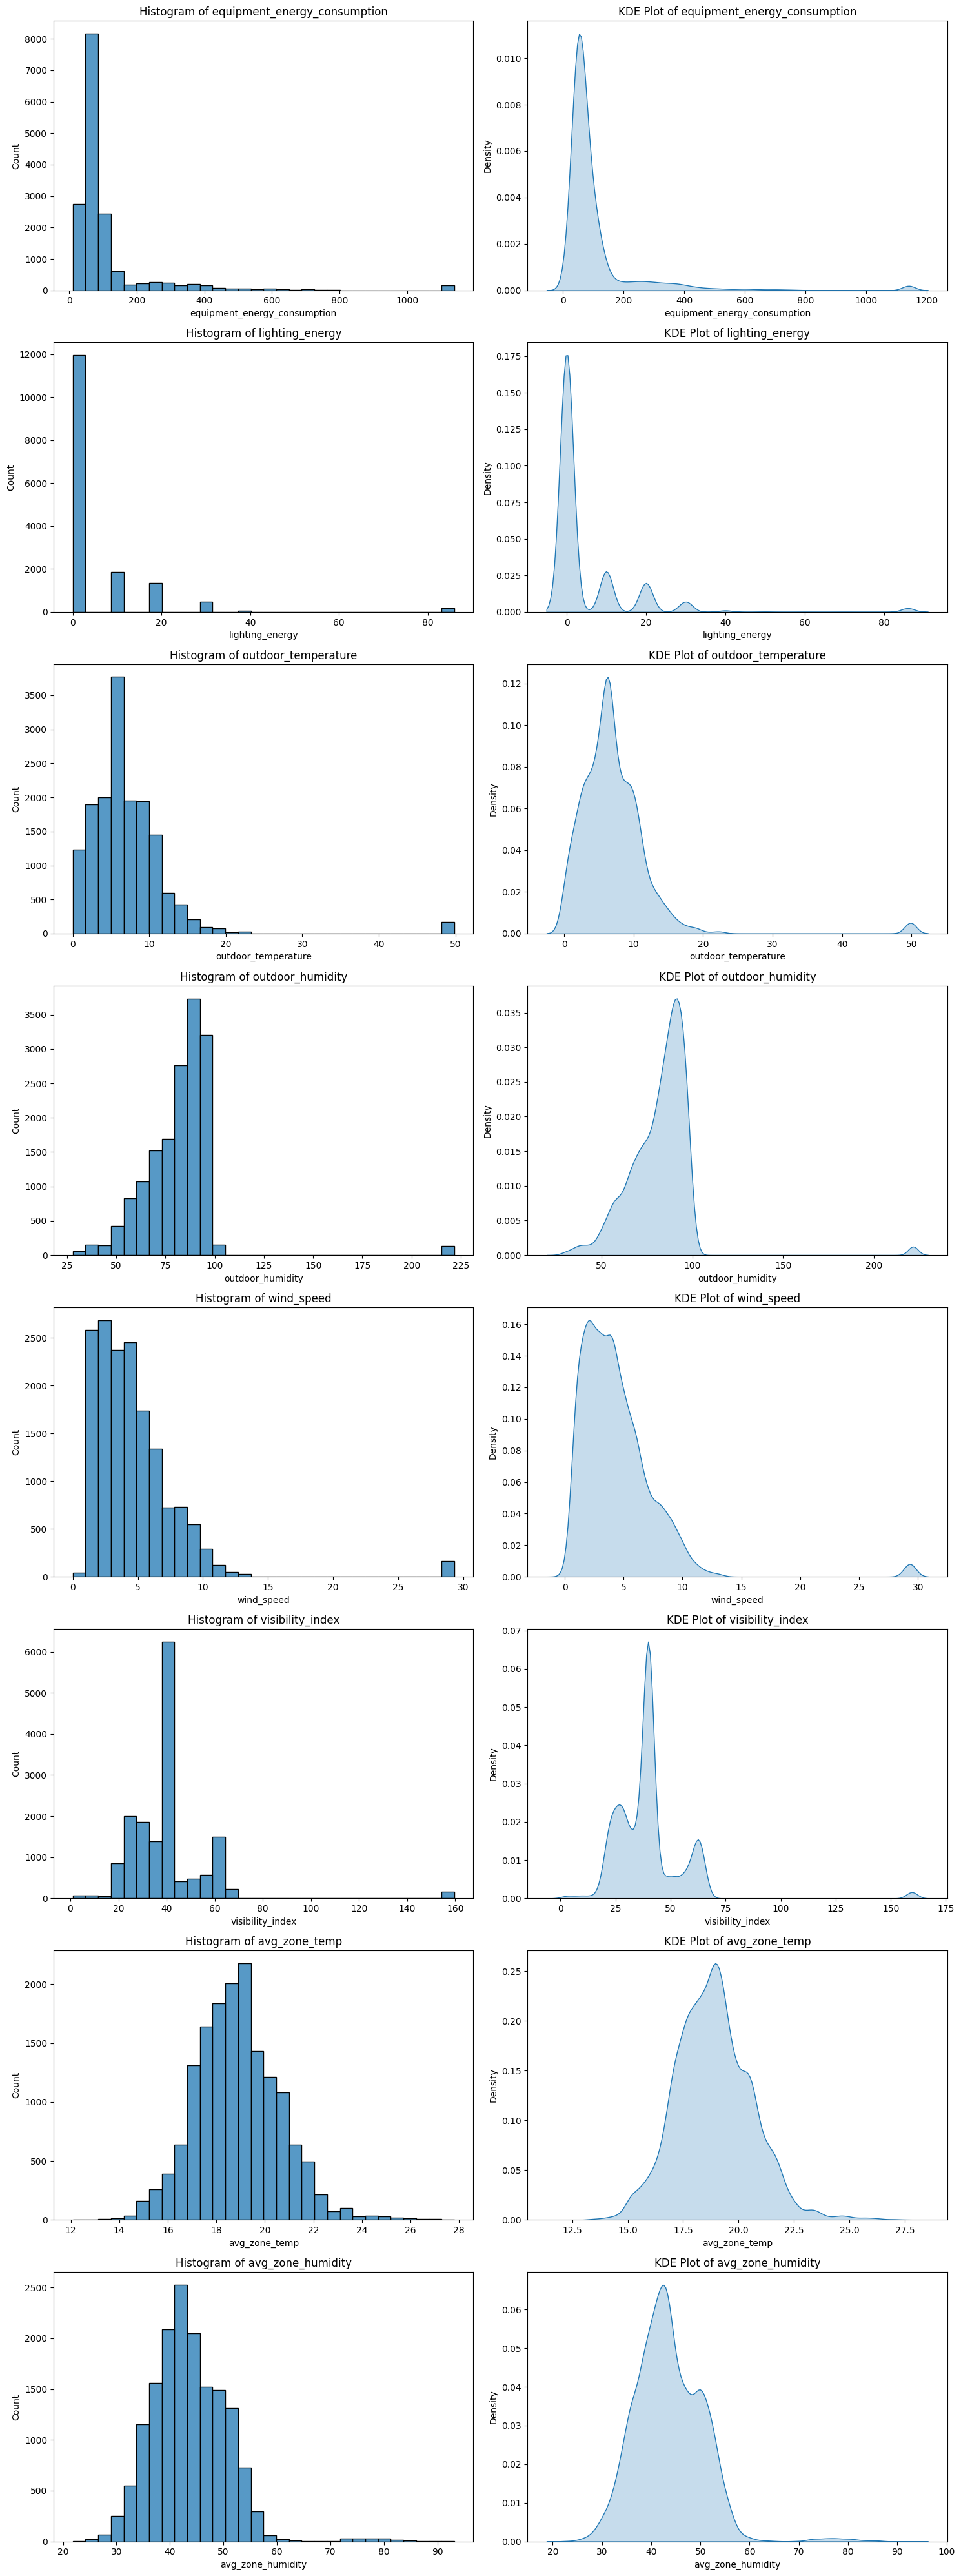

In [80]:
# Numerical columns  distribution plot
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Subplots for each numerical column
plt.figure(figsize=(15, 5 * len(numerical_cols)))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i-1)
    sns.histplot(data[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(len(numerical_cols), 2, 2*i)
    sns.kdeplot(data[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.savefig(f'EDA/{col}_distribution.png')

plt.tight_layout()
plt.show()

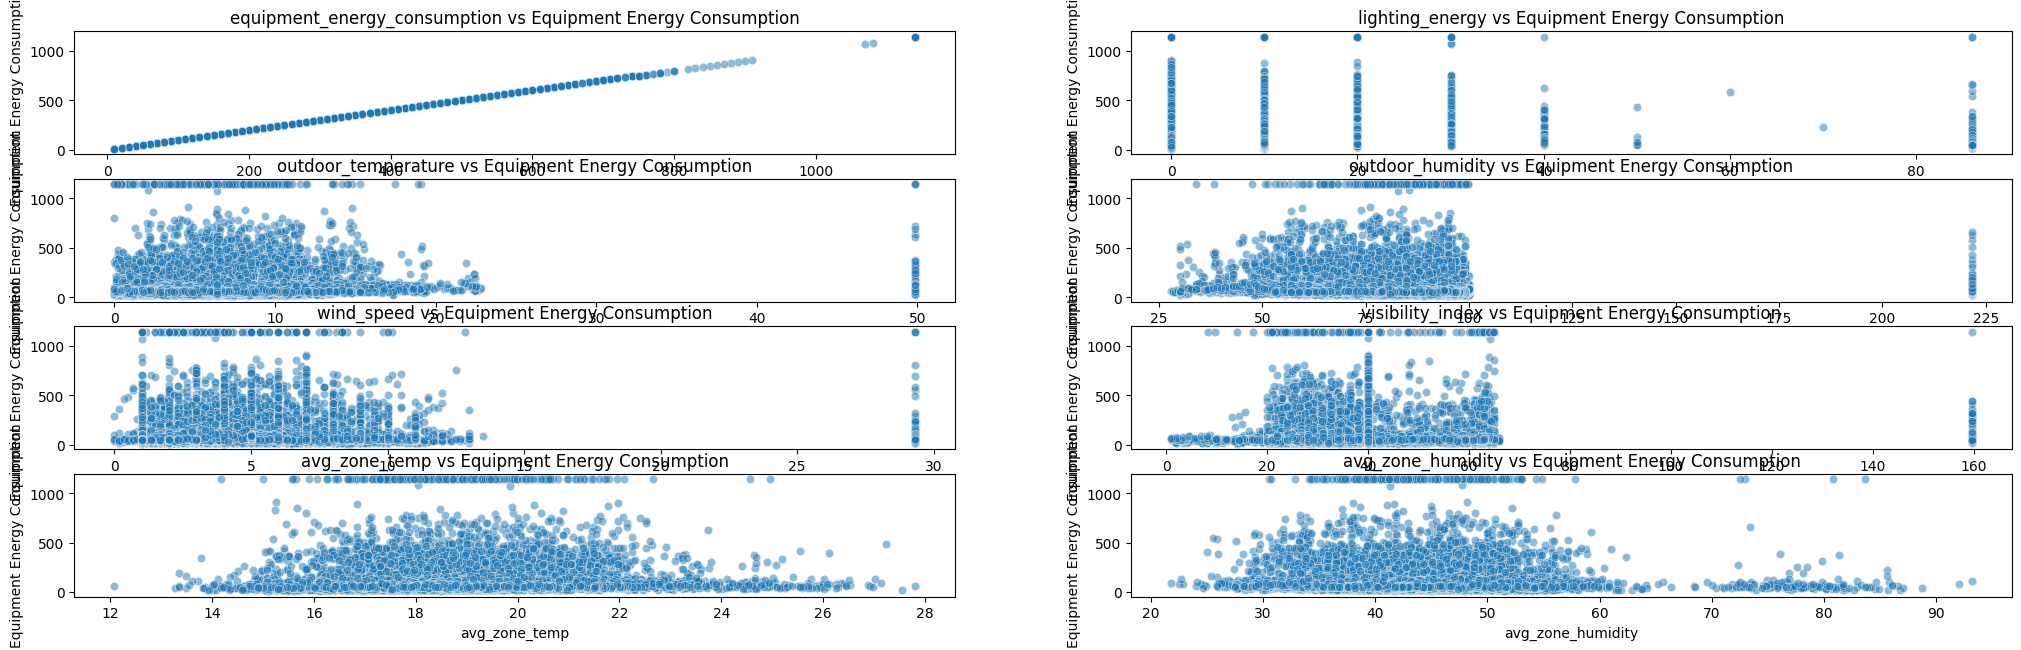

In [81]:
# find relationship between features and target variable
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.scatterplot(data=data, x=col, y='equipment_energy_consumption', alpha=0.5)
    plt.title(f'{col} vs Equipment Energy Consumption')
    plt.xlabel(col)
    plt.ylabel('Equipment Energy Consumption')
    plt.savefig(f'EDA/{col}_vs_equipment_energy_consumption.png')

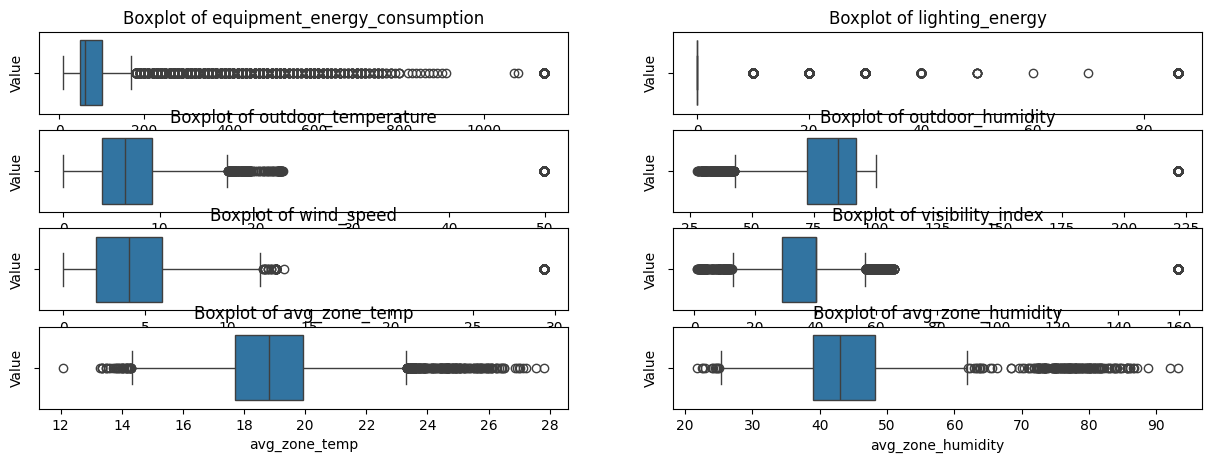

In [82]:
#  check for outliers using boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(data=data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

In [83]:
# 2. Distribution Plots for Numerical Features
numerical_cols = ['equipment_energy_consumption', 'lighting_energy', 'outdoor_temperature', 
                 'outdoor_humidity', 'wind_speed', 'visibility_index', 'avg_zone_temp', 'avg_zone_humidity']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('EDA/distribution_plots.png')
plt.close()

# 3. Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig('EDA/correlation_heatmap.png')
plt.close()

# 4. Time-Series Trends
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    plt.plot(data['timestamp'], data[col])
    plt.title(f'Trend of {col} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('EDA/time_series_trends.png')
plt.close()

# 5. Outlier Detection with Boxplots
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('EDA/boxplots.png')
plt.close()


#### 🌟 Exploratory Data Analysis (EDA) Insights 🌟
📊 1. Distribution Analysis

Understand the spread and shape of each feature:

    Equipment Energy Consumption:
        Highly right-skewed with most values below 200.
        Outliers reach up to 1000, indicating occasional energy spikes.
    Lighting Energy:
        Right-skewed, with most values below 20.
        Outliers up to 80, suggesting infrequent high usage (e.g., events).
    Outdoor Temperature:
        Slightly right-skewed, mostly between 0–30°C.
        A few values around 40°C indicate rare hot days.
    Outdoor Humidity:
        Bimodal distribution with peaks at 75 and 125.
        Extreme values up to 225, showing high variability.
    Wind Speed:
        Right-skewed, mostly between 0–15 m/s.
        Outliers up to 30 m/s, indicating occasional high winds.
    Visibility Index:
        Right-skewed with a peak around 60.
        Values stretch to 160, showing wide variability in visibility.
    Avg Zone Temp:
        Slightly right-skewed, mostly between 16–24°C.
        Outliers up to 28°C, suggesting stable indoor temperatures with occasional extremes.
    Avg Zone Humidity:
        Right-skewed, mostly between 40–60%.
        Outliers up to 90%, indicating controlled indoor humidity with occasional spikes.

🔗 2. Correlation Analysis

Explore relationships between features:

    Strong Positive Correlations:
        avg_zone_temp ↔ outdoor_temperature (0.38): Indoor temperature is moderately influenced by outdoor conditions.
        avg_zone_humidity ↔ outdoor_humidity (0.39): Indoor humidity follows outdoor humidity trends.
    Moderate Negative Correlations:
        avg_zone_temp ↔ outdoor_humidity (-0.32): Higher outdoor humidity may lower indoor temperatures (e.g., cooling systems).
        avg_zone_humidity ↔ avg_zone_temp (-0.34): Higher indoor humidity correlates with lower indoor temperatures.
    Weak Correlations:
        Energy features (equipment_energy_consumption, lighting_energy) show very weak correlations (all < 0.1) with environmental factors.
        Suggests energy usage may be driven by external factors (e.g., occupancy, time of day).

🚨 3. Outlier Detection (Boxplots)

Identify extreme values:

    Equipment Energy Consumption: Outliers above 800, indicating extreme energy usage events.
    Lighting Energy: Outliers above 60, suggesting occasional high lighting usage.
    Outdoor Temperature: Outliers above 35°C, showing rare hot days.
    Outdoor Humidity: Outliers above 175, indicating extreme humidity events.
    Wind Speed: Outliers above 25 m/s, showing occasional high wind events.
    Visibility Index: Outliers above 140, suggesting rare visibility extremes.
    Avg Zone Temp: Outliers above 26°C and below 14°C, indicating temperature extremes indoors.
    Avg Zone Humidity: Outliers above 80%, showing occasional high indoor humidity.

📅 4. Time-Series Trends

Analyze patterns over time (2016):

    Energy Consumption (equipment_energy_consumption, lighting_energy):
        Sharp spikes around 2016-07 and 2016-10, indicating potential events or malfunctions.
        Otherwise, usage remains relatively stable.
    Outdoor Temperature & Avg Zone Temp:
        Decline from 2016-07 to 2016-09, likely seasonal (summer to fall).
        Spikes in 2016-10 align with energy spikes.
    Outdoor Humidity & Avg Zone Humidity:
        Peaks in 2016-07 and 2016-10, aligning with energy spikes.
        Suggests humidity may influence energy usage (e.g., HVAC systems).
    Wind Speed & Visibility Index:
        Relatively stable with occasional spikes (e.g., 2016-07, 2016-10).
        Aligns with other environmental changes.

🔑 5. Key Insights

Summarizing actionable findings:

    Energy Usage Patterns:
        Spikes in energy consumption align with environmental changes (e.g., high humidity/temperature).
        Suggests HVAC or lighting systems may be responding to these conditions.
    Environmental Influence:
        Indoor conditions (avg_zone_temp, avg_zone_humidity) are moderately influenced by outdoor factors.
        Weak correlation with energy usage suggests other factors (e.g., occupancy, schedules) dominate.
    Outliers and Spikes:
        Significant outliers and time-series spikes (mid-2016) may indicate events, system malfunctions, or extreme weather.
    Seasonal Trends:
        Decline in temperature/humidity from 2016-07 to 2016-09 suggests seasonal patterns (summer to fall).
        Useful for predictive modeling.
    Feature Selection:
        Low correlations between energy usage and environmental factors suggest these features alone may not predict energy usage effectively.
        Additional features (e.g., time of day, occupancy) may be needed.

#### Feature Engineering

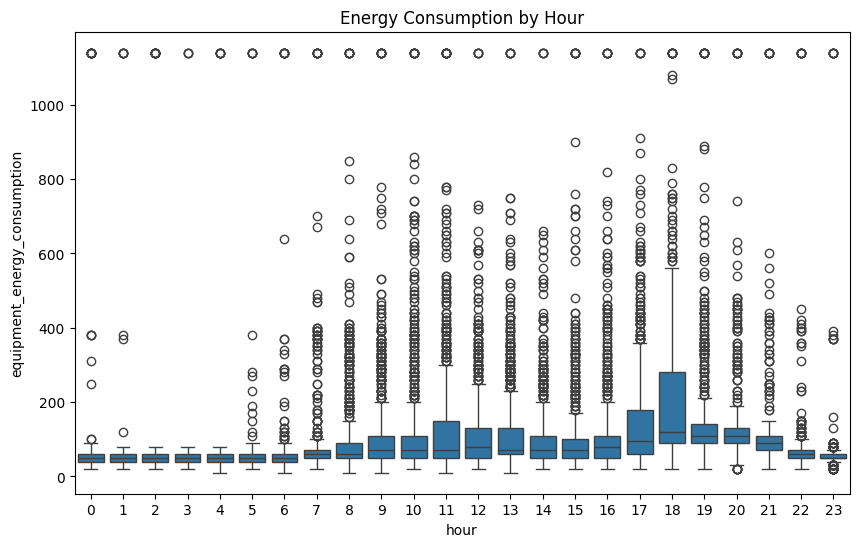

In [84]:
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Energy consumption by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=data)
plt.title('Energy Consumption by Hour')
plt.show()

In [85]:
data['energy_lag1'] = data['equipment_energy_consumption'].shift(1)
data['energy_lag2'] = data['equipment_energy_consumption'].shift(2)
data.fillna(data.median(), inplace=True)

In [86]:
data['zone_temp_hum_interaction'] = data['avg_zone_temp'] * data['avg_zone_humidity']

In [87]:
# check shape of the data with check for missing values and negative values
print("Missing Values After Feature Engineering:")
print(data.isnull().sum())
print("Negative Values After Feature Engineering:")
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
print((numeric_data < 0).sum().sum())
print("Shape of the data after feature engineering:", data.shape)

Missing Values After Feature Engineering:
timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
outdoor_temperature             0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
avg_zone_temp                   0
avg_zone_humidity               0
hour                            0
day_of_week                     0
is_weekend                      0
energy_lag1                     0
energy_lag2                     0
zone_temp_hum_interaction       0
dtype: int64
Negative Values After Feature Engineering:
0
Shape of the data after feature engineering: (15880, 15)


### lets handle the outliers 

In [88]:
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

for col in ['equipment_energy_consumption', 'outdoor_humidity']:
    data = clip_outliers(data, col)

#### Train and Test split and feature scaling

In [89]:
X = data.drop(['equipment_energy_consumption', 'timestamp'], axis=1)
y = data['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
lgbm.fit(X_train_scaled, y_train)

y_pred_lgbm = lgbm.predict(X_test_scaled)
lgbm_r2 = r2_score(y_test, y_pred_lgbm)
print("LightGBM R² Score:", lgbm_r2)

# print accuracy 
print("LightGBM Accuracy:")
print(lgbm.score(X_test_scaled, y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 13
[LightGBM] [Info] Start training from score 78.717727
LightGBM R² Score: 0.6324748684710435
LightGBM Accuracy:
0.6324748684710435


c:\Users\fahee\miniconda3\envs\cancer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\fahee\miniconda3\envs\cancer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [91]:
# Dictionary to store R² scores
model_scores = {}

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
model_scores['Linear Regression'] = r2_score(y_test, y_pred_lr)
print("Linear Regression R² Score:", model_scores['Linear Regression'])

# 2. Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
model_scores['Ridge Regression'] = r2_score(y_test, y_pred_ridge)
print("Ridge Regression R² Score:", model_scores['Ridge Regression'])

# 3. Lasso Regression
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
model_scores['Lasso Regression'] = r2_score(y_test, y_pred_lasso)
print("Lasso Regression R² Score:", model_scores['Lasso Regression'])

# ElasticNet Regression
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)
y_pred_en = elastic_net.predict(X_test_scaled)
model_scores['ElasticNet'] = r2_score(y_test, y_pred_en)
print("ElasticNet R² Score:", model_scores['ElasticNet'])


# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor(random_state=42)  
dt.fit(X_train_scaled, y_train)  
y_pred_dt = dt.predict(X_test_scaled)  
model_scores['Decision Tree'] = r2_score(y_test, y_pred_dt)  
print("Decision Tree R² Score:", model_scores['Decision Tree'])

# 4. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
model_scores['Random Forest'] = r2_score(y_test, y_pred_rf)
print("Random Forest R² Score:", model_scores['Random Forest'])

# 5. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)
model_scores['Gradient Boosting'] = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting R² Score:", model_scores['Gradient Boosting'])

# 6. XGBoost Regressor
xgbr = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)
xgbr.fit(X_train_scaled, y_train)
y_pred_xgbr = xgbr.predict(X_test_scaled)
model_scores['XGBoost'] = r2_score(y_test, y_pred_xgbr)
print("XGBoost R² Score:", model_scores['XGBoost'])

# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)
model_scores['AdaBoost'] = r2_score(y_test, y_pred_ada)
print("AdaBoost R² Score:", model_scores['AdaBoost'])

# 7. LightGBM Regressor (re-run to confirm)
lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=42, force_col_wise=True)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)
model_scores['LightGBM'] = r2_score(y_test, y_pred_lgbm)
print("LightGBM R² Score:", model_scores['LightGBM'])

# catboost
from catboost import CatBoostRegressor
catboost = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
catboost.fit(X_train_scaled, y_train)
y_pred_catboost = catboost.predict(X_test_scaled)
model_scores['CatBoost'] = r2_score(y_test, y_pred_catboost)
print("CatBoost R² Score:", model_scores['CatBoost'])


# 8. Support Vector Regressor (SVR)
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
model_scores['SVR'] = r2_score(y_test, y_pred_svr)
print("SVR R² Score:", model_scores['SVR'])

# Knn Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
model_scores['KNN'] = r2_score(y_test, y_pred_knn)
print("KNN R² Score:", model_scores['KNN'])

Linear Regression R² Score: 0.35360657236963033
Ridge Regression R² Score: 0.3536055404329418
Lasso Regression R² Score: 0.34889306008430265
ElasticNet R² Score: 0.3275701986014432
Decision Tree R² Score: 0.3006836929255565
Random Forest R² Score: 0.6398541161324907
Gradient Boosting R² Score: 0.6433674917011537
XGBoost R² Score: 0.6248608111246192
AdaBoost R² Score: 0.51177074195994
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 12704, number of used features: 13
[LightGBM] [Info] Start training from score 78.717727


c:\Users\fahee\miniconda3\envs\cancer\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM R² Score: 0.6324748684710435
CatBoost R² Score: 0.6462923953978903
SVR R² Score: 0.5444577193447728
KNN R² Score: 0.5349520157452583


#### only Catboost , Gradient Boosting and Random Forest gives accuracy nearly around 64 to 65 % so we can go some advanced techniques like create additional features and some advance techniques we create separted notebook from start to end 